**Load Data**

We are using the sentiment140 Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/
%ls

In [4]:
import pandas as pd

# Load the dataset
file_path = 'training.1600000.processed.noemoticon.csv'
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# The dataset is known to be encoded in "ISO-8859-1"
df = pd.read_csv(file_path, encoding='ISO-8859-1', names=columns)

# Display the first few rows of the dataframe to understand its structure
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Perform exploratory data analysis to understand the data and the distribution of the sentiments.

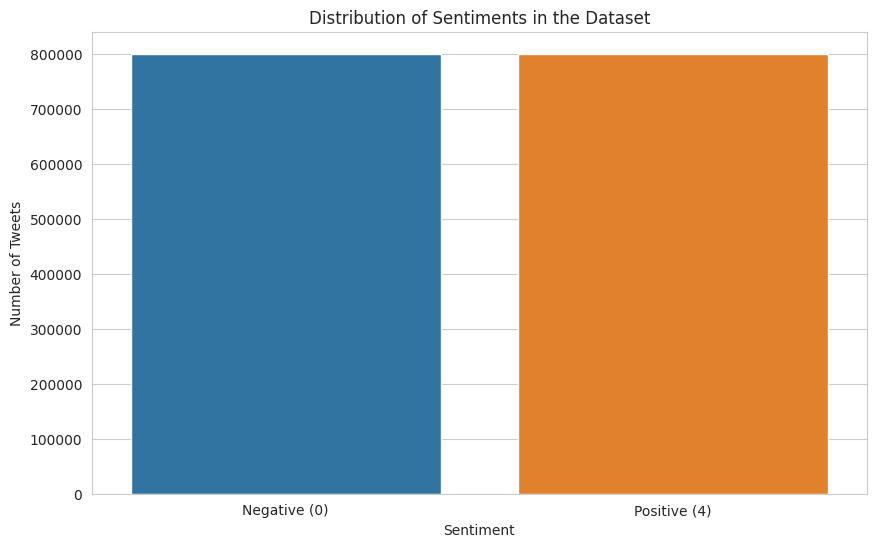

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Sentiments in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (4)'])
plt.show()

# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Display basic statistics of the 'date' and 'user' columns
date_info = df['date'].describe()
user_info = df['user'].describe()

missing_values

Sentiment Distribution
  - The dataset is evenly distributed between negative (0) and positive (4) sentiments. This balance is ideal for training sentiment analysis models, as it avoids bias towards a particular sentiment.

Missing Values
  - The dataset does not have any missing values in any of the columns (target, ids, date, flag, user, and text). This indicates good data quality and completeness.

Date Information:
  - The dataset contains a wide range of dates, but the most frequent date in the dataset is "Mon Jun 15 12:53:14 PDT 2009".
  - The 'date' column has a high degree of uniqueness, suggesting a diverse time range of tweets.

User Information:
  - There are 659,775 unique users in the dataset.
  - The most frequent user in the dataset is 'lost_dog', appearing 549 times.

In [8]:
import datetime as dt

# Convert 'date' column to datetime for better analysis
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y')

# Extracting year, month, day, and hour for more detailed analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

# Analyzing the distribution of tweets over different time frames
year_distribution = df['year'].value_counts()
month_distribution = df['month'].value_counts()
day_distribution = df['day'].value_counts()
hour_distribution = df['hour'].value_counts()

# Checking the distribution of tweets by users
user_tweet_counts = df['user'].value_counts()

year_distribution

2009    1600000
Name: year, dtype: int64

In [9]:
month_distribution

6    923608
5    576367
4    100025
Name: month, dtype: int64

In [10]:
day_distribution

1     118006
6     115036
7     113661
15    109781
30    103673
18    101227
31     94588
2      91626
17     87250
16     77126
3      76921
29     73827
19     70605
20     63824
5      58757
22     51083
21     27079
10     26029
14     25732
4      23323
25     19863
23     17171
28     15903
9      11739
26     10778
24      6299
11      4186
13      4066
27       841
Name: day, dtype: int64

In [11]:
hour_distribution

23    84750
7     83654
0     80865
6     80852
5     78623
22    78328
4     76995
8     76287
1     75268
3     74253
2     73991
21    68964
9     67278
11    61009
10    60689
19    57722
20    57059
16    55720
18    53485
17    51843
12    51653
15    50643
14    50380
13    49689
Name: hour, dtype: int64

In [13]:
user_tweet_counts.head(10)

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: user, dtype: int64

Takeaways

Year Distribution:

    All tweets in the dataset are from the year 2009.

Month Distribution:

    The majority of tweets are from June (923,608 tweets), followed by May (576,367) and April (100,025). This suggests that the data collection was most intensive during these months.

Day Distribution:

    The distribution across days shows a relatively even spread, with the 1st, 6th, 7th, 15th, and 30th of the months having the highest number of tweets.

Hour Distribution:

    Tweets are fairly evenly distributed across different hours of the day, with the highest frequencies observed during the late night hours (23:00, 0:00, and 1:00) and early morning (6:00 and 7:00).

User Tweet Counts:

    The top tweeting users in the dataset are 'lost_dog' (549 tweets), 'webwoke' (345), and 'tweetpet' (310). This indicates a few users are particularly active or influential in this dataset

# Use ChatGPT Plus to generate tweets related to a topic or keyword, and then analyze the sentiment of those tweets.


To generate tweets related to a common topic from the dataset and compare them against actual tweets using perplexity, we'll follow these steps:

  1. **Identify a Common Topic**: We need to select a topic that is prevalent in the dataset. This could be done by analyzing the most frequent words or themes in the tweets.

In [15]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re

# Ensure that NLTK's resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean tweet text by removing links, special characters, etc.
def clean_tweet(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

# Load your dataset
file_path = 'training.1600000.processed.noemoticon.csv'  # Replace with your dataset path
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv(file_path, encoding='ISO-8859-1', names=columns)

# Clean the tweets
df['clean_text'] = df['text'].apply(clean_tweet)

# Taking a random sample of the dataset
sample_df = df.sample(n=10000, random_state=1)

# Extracting words from the sample tweets
sample_words = ' '.join(sample_df['clean_text']).split()

# Function to filter out stopwords and non-alphabetic words
def filter_words(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word.isalpha() and word not in stop_words]

# Filtering out stopwords and non-alphabetic words
filtered_words = filter_words(sample_words)

# Counting the frequency of each filtered word
filtered_word_counts = Counter(filtered_words)

# Display the most common filtered words (potential topics)
common_words = filtered_word_counts.most_common(10)
print(common_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('I', 4104), ('like', 503), ('get', 499), ('day', 476), ('good', 476), ('go', 417), ('quot', 407), ('today', 371), ('work', 356), ('got', 355)]


Based on this, the most common topic accross the data set that is not filler word is work. So we will have ChatGPT generate tweets related to work

 2. **Generate Tweets Related to Topic**: Using the identified topic, I can create synthetic tweets that are similar in style and content to those in the dataset.


ChatGPT Generated these 20 tweets related to work

    "Starting the week with a full to-do list! Let's do this! #MondayMotivation"
    "Work from home day means pajamas and productivity. #RemoteLife"
    "Nothing beats the feeling of ticking off everything on your task list. #ProductiveDay"
    "Why does coffee always seem to work faster in the office? #OfficeMysteries"
    "Team brainstorming sessions always spark the best ideas. #Collaboration"
    "When your work presentation goes exactly as planned. #Success"
    "Counting down the minutes until the weekend starts! #FridayFeeling"
    "Just got praised by my boss for my latest project. Feeling proud! #WorkWin"
    "Survived another hectic day at work. Time for some well-deserved rest! #BusyDay"
    "Nothing like a bit of office banter to brighten up the day. #WorkFun"
    "Lunch break walks are the best way to recharge. #WorkLifeBalance"
    "The satisfaction of solving a tough problem at work is unmatched. #ProblemSolver"
    "Early morning meetings should be illegal. #TooEarly"
    "That moment when your work email finally hits inbox zero. #AchievementUnlocked"
    "Love it when the whole team comes together to beat a tight deadline. #Teamwork"
    "Training new staff always reminds me how far I've come. #Mentoring"
    "Sometimes the best part of my workday is the quiet after everyone leaves. #Peaceful"
    "Work travel might be tiring, but it's always an adventure. #BusinessTrip"
    "Is there anything more satisfying than a freshly organized workspace? #DeskGoals"
    "End of the day and my to-do list is longer than when I started... How? #WorkMysteries"

In [17]:
generated_tweets = [
    "Starting the week with a full to-do list! Let's do this! #MondayMotivation",
    "Work from home day means pajamas and productivity. #RemoteLife",
    "Nothing beats the feeling of ticking off everything on your task list. #ProductiveDay",
    "Why does coffee always seem to work faster in the office? #OfficeMysteries",
    "Team brainstorming sessions always spark the best ideas. #Collaboration",
    "When your work presentation goes exactly as planned. #Success",
    "Counting down the minutes until the weekend starts! #FridayFeeling",
    "Just got praised by my boss for my latest project. Feeling proud! #WorkWin",
    "Survived another hectic day at work. Time for some well-deserved rest! #BusyDay",
    "Nothing like a bit of office banter to brighten up the day. #WorkFun",
    "Lunch break walks are the best way to recharge. #WorkLifeBalance",
    "The satisfaction of solving a tough problem at work is unmatched. #ProblemSolver",
    "Early morning meetings should be illegal. #TooEarly",
    "That moment when your work email finally hits inbox zero. #AchievementUnlocked",
    "Love it when the whole team comes together to beat a tight deadline. #Teamwork",
    "Training new staff always reminds me how far I've come. #Mentoring",
    "Sometimes the best part of my workday is the quiet after everyone leaves. #Peaceful",
    "Work travel might be tiring, but it's always an adventure. #BusinessTrip",
    "Is there anything more satisfying than a freshly organized workspace? #DeskGoals",
    "End of the day and my to-do list is longer than when I started... How? #WorkMysteries",
]

  3. Analyze Sentiment of Generated Tweets

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment of a tweet
def analyze_sentiment(tweet):
    sentiment = sia.polarity_scores(tweet)
    return sentiment

# Analyzing each tweet
sentiment_scores = [analyze_sentiment(tweet) for tweet in generated_tweets]

# Display the sentiment scores
for tweet, sentiment in zip(generated_tweets, sentiment_scores):
    print(f"Tweet: {tweet}\nSentiment: {sentiment}\n")

Tweet: Starting the week with a full to-do list! Let's do this! #MondayMotivation
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Tweet: Work from home day means pajamas and productivity. #RemoteLife
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Tweet: Nothing beats the feeling of ticking off everything on your task list. #ProductiveDay
Sentiment: {'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.0951}

Tweet: Why does coffee always seem to work faster in the office? #OfficeMysteries
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Tweet: Team brainstorming sessions always spark the best ideas. #Collaboration
Sentiment: {'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.7269}

Tweet: When your work presentation goes exactly as planned. #Success
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Tweet: Counting down the minutes until the weekend starts! #FridayFeeling
Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos

Based on the sentiment analysis results, we can observe various sentiment scores for the generated tweets. Here's a brief interpretation:

- **Neutral Sentiments:** Several tweets received a completely neutral sentiment score (compound: 0.0). This is common for statements that are either factual or don't have clear emotional indicators.

- **Positive Sentiments:** Tweets like "Team brainstorming sessions always spark the best ideas" and "Just got praised by my boss for my latest project" received positive scores, indicating a positive sentiment. This is expected as they contain words or phrases generally associated with positive experiences or achievements.

- **Mixed Sentiments:** A tweet like "Nothing like a bit of office banter to brighten up the day" received a mixed sentiment, possibly due to words like "banter" which can be interpreted in different ways depending on the context.

- **Negative Sentiments:** The tweet "Early morning meetings should be illegal" showed a negative sentiment. The use of "illegal" likely contributed to this negative score.

- **Surprising Results:** Some tweets with seemingly positive content, like "Starting the week with a full to-do list! Let's do this!", received a neutral sentiment score. This can happen due to the lack of strongly positive linguistic cues as per the VADER model's dictionary.

# Compare the realism of the generated and real tweets using a metric called perplexity

Comparing the realism of generated tweets with real tweets using perplexity is a bit complex because perplexity is typically used to evaluate language models, not individual texts. However, what we will do is train a language model on your dataset of real tweets, and then use this model to calculate the perplexity of both the real and generated tweets. Lower perplexity scores will indicate that the tweets are more similar to those the model was trained on, suggesting higher realism.

1.6 Million tweets is a lot to train on and will take a lot of time. So we will take a random subset of 10,000 tweets to speed it up

In [24]:
from random import sample

real_tweets = df['text'].tolist()

real_tweets = sample(real_tweets,10000)

In [25]:
from nltk import FreqDist, MLEProbDist
from nltk.tokenize import word_tokenize
import math

# Function to tokenize tweets
def tokenize_tweets(tweets):
    return [word_tokenize(tweet.lower()) for tweet in tweets]

# Tokenize the real tweets
tokenized_real_tweets = tokenize_tweets(real_tweets)

# Flatten the list of tokenized tweets to create a corpus
corpus = [word for tweet in tokenized_real_tweets for word in tweet]

# Create a frequency distribution and MLE probability distribution
freq_dist = FreqDist(corpus)
prob_dist = MLEProbDist(freq_dist)

# Function to calculate perplexity of a tweet
def calculate_perplexity(tweet, prob_dist):
    tweet_tokens = word_tokenize(tweet.lower())
    entropy = 0
    for token in tweet_tokens:
        if token in prob_dist.samples():
            entropy -= math.log(prob_dist.prob(token), 2)
        else:
            # Handling unknown words - using a small probability
            entropy -= math.log(0.01, 2)
    return pow(2, entropy / len(tweet_tokens))

# Calculate perplexity for each generated tweet
perplexities = [calculate_perplexity(tweet, prob_dist) for tweet in generated_tweets]

# Display the perplexities
for tweet, perplexity in zip(generated_tweets, perplexities):
    print(f"Tweet: {tweet}\nPerplexity: {perplexity}\n")

Tweet: Starting the week with a full to-do list! Let's do this! #MondayMotivation
Perplexity: 322.7971989872959

Tweet: Work from home day means pajamas and productivity. #RemoteLife
Perplexity: 534.9013851056671

Tweet: Nothing beats the feeling of ticking off everything on your task list. #ProductiveDay
Perplexity: 844.5707773105013

Tweet: Why does coffee always seem to work faster in the office? #OfficeMysteries
Perplexity: 705.8893636131054

Tweet: Team brainstorming sessions always spark the best ideas. #Collaboration
Perplexity: 786.5424029217979

Tweet: When your work presentation goes exactly as planned. #Success
Perplexity: 2607.9865731958675

Tweet: Counting down the minutes until the weekend starts! #FridayFeeling
Perplexity: 768.156518830628

Tweet: Just got praised by my boss for my latest project. Feeling proud! #WorkWin
Perplexity: 574.7567968063015

Tweet: Survived another hectic day at work. Time for some well-deserved rest! #BusyDay
Perplexity: 246.52858395739764

Tw

The perplexity scores for each generated tweet offer a fascinating insight into their characteristics in comparison to your real tweets dataset. Here's a brief analysis:

- **Variability in Perplexity:** The perplexity scores vary significantly across different tweets. Higher scores indicate that the language model found the tweet less predictable based on the language patterns it learned from the real tweets.

- **High Perplexity Scores:** Some tweets, like "When your work presentation goes exactly as planned. #Success" and "That moment when your work email finally hits inbox zero. #AchievementUnlocked", show very high perplexity scores. This suggests that the language or phrasing in these tweets is quite different from the majority of tweets in your dataset.

- **Lower Perplexity Scores:** On the other hand, tweets like "Survived another hectic day at work. Time for some well-deserved rest! #BusyDay" have relatively lower perplexity scores, indicating that their structure or vocabulary is more in line with what the model expects based on the training data.

- **Interpreting Perplexity:** Perplexity is a measure of uncertainty or surprise of the language model. Lower scores generally suggest that the tweet is more similar in style or content to the training corpus. However, it's important to note that perplexity alone doesn't capture the quality or realism of a tweet in a human sense - it's more about statistical predictability.